In [ ]:
import os
os.chdir('/content/drive/MyDrive/Jynx-Stage2')

Import required liberaries

In [ ]:
import numpy as np
import pandas as pd
import cv2
import PIL
import matplotlib.pyplot as plt

set a base directory

In [ ]:
base_dir = '/content/drive/MyDrive/Jynx-Stage2'

##Function to detect traffic light colors and classify them accordingly

#### ***The HSV*** or Hue, Saturation and Value of a given object is the color space associated with the object in OpenCV where Hue represents the color, Saturation represents the greyness and Value represents the brightness. It is used to solve the problems related to computer vision because of its better performance when compared to RGB.

####  ***OpenCV Hough Transform*** A feature extraction method used to detect the simple shapes such as lines, circles etc. in an image. HoughCircles() function detects circles in an image and return detected circles in the image.

#### Hough Gradient Method uses the gradient information of edges.



In [ ]:


def detect(filepath, file):

    font = cv2.FONT_HERSHEY_SIMPLEX  #font that represent classes on resultant images
    img = cv2.imread(os.path.join(filepath, file)) #input image from assigened path
    cimg = img.copy() #copy images to save the original in its base state
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #convert the image into hsv

    # color range according to hsv in order to detect colors
    lower_red1 = np.array([0,100,100]) #lower red hsv boundary
    upper_red1 = np.array([9,255,255]) #upper red hsv boundary
    lower_red2 = np.array([159,100,100]) #lower red hsv boundary
    upper_red2 = np.array([180,255,255]) #upper red hsv boundary
    lower_green = np.array([36,50,50])  #lowee green hsv boundary
    upper_green = np.array([89,255,255]) #upper green hsv boundary
    
    lower_yellow = np.array([15,150,150]) #lower yellow hsv boundary
    upper_yellow = np.array([35,255,255]) #upper yellow hsv boundary

    #threshold the images to get only the selected color
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    maskg = cv2.inRange(hsv, lower_green, upper_green)
    masky = cv2.inRange(hsv, lower_yellow, upper_yellow)
    maskr = cv2.add(mask1, mask2)

    size = img.shape
    # print size

    # hough circle detect
    r_circles = cv2.HoughCircles(maskr, cv2.HOUGH_GRADIENT, 1, 80,
                               param1=50, param2=10, minRadius=0, maxRadius=30)

    g_circles = cv2.HoughCircles(maskg, cv2.HOUGH_GRADIENT, 1, 60,
                                 param1=50, param2=10, minRadius=0, maxRadius=30)

    y_circles = cv2.HoughCircles(masky, cv2.HOUGH_GRADIENT, 1, 30,
                                 param1=50, param2=5, minRadius=0, maxRadius=30)

    # drawing the detected circles on images

    
    r = 5  #range to detect the circles in the masked image
    bound = 4.0 / 10  
    if r_circles is not None: #if red circles are present
        r_circles = np.uint16(np.around(r_circles)) #convert the center coordinates and  circle radius into int

        for i in r_circles[0, :]:
            #i[0] = x coordinate
            #i[1] = y coordinate
            #i[2] = radius
            if i[0] > size[1] or i[1] > size[0]or i[1] > size[0]*bound: #setting condition so points out of the image dimensions are not included
                continue
            #h and s represent the range for circles
            h, s = 0.0, 0.0
            for m in range(-r, r):
                for n in range(-r, r):
                    #condition to ignore regions which are not circles
                    if (i[1]+m) >= size[0] or (i[0]+n) >= size[1]:
                        continue
                    h += maskr[i[1]+m, i[0]+n]
                    s += 1
            if h / s > 50:
                cv2.circle(cimg, (i[0], i[1]), i[2]+10, (0, 255, 0), 2) #drawing circle aroung detected circle on imput image
                #cv2.circle(maskr, (i[0], i[1]), i[2]+30, (255, 255, 255), 2)
                cv2.putText(cimg,'RED',(i[0], i[1]), font, 1,(255,0,0),2,cv2.LINE_AA) #putting color name representation of detected circle

    if g_circles is not None:
        g_circles = np.uint16(np.around(g_circles))

        for i in g_circles[0, :]:
            if i[0] > size[1] or i[1] > size[0] or i[1] > size[0]*bound:
                continue

            h, s = 0.0, 0.0
            for m in range(-r, r):
                for n in range(-r, r):

                    if (i[1]+m) >= size[0] or (i[0]+n) >= size[1]:
                        continue
                    h += maskg[i[1]+m, i[0]+n]
                    s += 1
            if h / s > 100:
                cv2.circle(cimg, (i[0], i[1]), i[2]+10, (0, 255, 0), 2)
                #cv2.circle(maskg, (i[0], i[1]), i[2]+30, (255, 255, 255), 2)
                cv2.putText(cimg,'GREEN',(i[0], i[1]), font, 1,(255,0,0),2,cv2.LINE_AA)

    if y_circles is not None:
        y_circles = np.uint16(np.around(y_circles))

        for i in y_circles[0, :]:
            if i[0] > size[1] or i[1] > size[0] or i[1] > size[0]*bound:
                continue

            h, s = 0.0, 0.0
            for m in range(-r, r):
                for n in range(-r, r):

                    if (i[1]+m) >= size[0] or (i[0]+n) >= size[1]:
                        continue
                    h += masky[i[1]+m, i[0]+n]
                    s += 1
            if h / s > 50:
                cv2.circle(cimg, (i[0], i[1]), i[2]+10, (0, 255, 0), 2)
                #cv2.circle(masky, (i[0], i[1]), i[2]+30, (255, 255, 255), 2)
                cv2.putText(cimg,'YELLOW',(i[0], i[1]), font, 1,(255,0,0),2,cv2.LINE_AA)
    
    
    
    
    
    #cimg = cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB)
    cv2.imwrite(file, cimg)
   


In [ ]:
path = os.path.join(base_dir, 'frames')
for f in os.listdir(path):
  print(f)
  if f.endswith('.jpg') or f.endswith('.JPG'):
    detect(path, f) #call function by passing path to images and imagefile

sim_g_0105.jpg
sim_y_0001.jpg
IMG_0220.JPG
IMG_0240.JPG
uda_1_y_0091.jpg
sim_g_0039.jpg
uda_1_g_0090.jpg
15.jpg
IMG_0227.JPG
IMG_0239.JPG
uda_1_g_0118.jpg
sim_g_0079.jpg
21.jpg
uda_y_0243.jpg
14.jpg
2.jpg
sim_g_0048.jpg
1.jpg
8.jpg
IMG_0226.JPG
IMG_0000.jpg
IMG_0229.JPG
IMG_0218.JPG
uda_y_0064.jpg
sim_r_0065.jpg
car_backlight_red.jpg


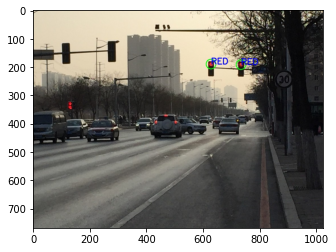

In [ ]:
x = cv2.imread('/content/drive/MyDrive/Jynx-Stage2/IMG_0240.JPG')
plt.imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB))